In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir = data_dir / 'flower_photos'
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/flower_photos/roses/6231418894_7946a7712b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5182167964_9d1a0be0b8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16670921315_0fc48d7ab2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2892056920_918c52889b_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2183357362_4b4da4b6b5.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15509799653_0562d4a4fa.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/467553

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/6231418894_7946a7712b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5182167964_9d1a0be0b8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16670921315_0fc48d7ab2_n.jpg')]

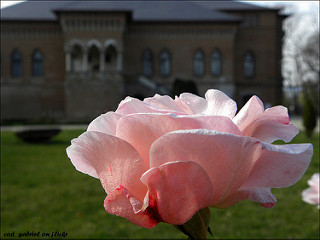

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
tulips = list(data_dir.glob("tulips/*"))
tulips[:5]

[PosixPath('datasets/flower_photos/flower_photos/tulips/8702982836_75222725d7.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/8712268519_f4c2c39a06_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/7166606598_5d2cd307c3.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/14084749296_6143c74c72_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/13530690445_9f1f5cf43a_n.jpg')]

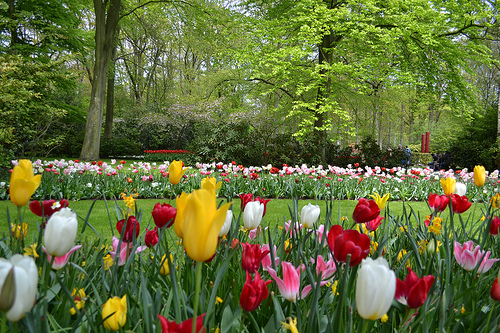

In [9]:
PIL.Image.open(tulips[2])

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/flower_photos/roses/6231418894_7946a7712b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5182167964_9d1a0be0b8_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/5731750490_ba3325b7ee_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/515121050_dcb99890be.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/16670921315_0fc48d7ab2_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/8742493689_fb852f0228_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2892056920_918c52889b_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/2183357362_4b4da4b6b5.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/15509799653_0562d4a4fa.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/467553

In [11]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [ ]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/flower_photos/roses/6231418894_7946a7712b_n.jpg')

array([[[ 39,  20, 129],
        [ 38,  19, 128],
        [ 37,  19, 132],
        ...,
        [ 12,   8, 114],
        [ 16,   5, 115],
        [ 30,  10, 133]],

       [[ 13,   4, 114],
        [ 14,   5, 116],
        [ 17,   8, 119],
        ...,
        [  0,   0, 104],
        [  9,   6, 116],
        [ 10,   2, 119]],

       [[  1,   4, 108],
        [  3,   3, 109],
        [  4,   4, 110],
        ...,
        [  0,   3, 106],
        [  0,   0, 110],
        [  0,   4, 116]],

       ...,

       [[  9,   0,  90],
        [  5,   0,  86],
        [  3,   0,  84],
        ...,
        [ 82,  32, 164],
        [ 84,  34, 166],
        [ 86,  35, 169]],

       [[  0,   0,  83],
        [  1,   0,  84],
        [  2,   0,  84],
        ...,
        [ 83,  33, 165],
        [ 86,  36, 168],
        [ 89,  36, 170]],

       [[  0,   3,  86],
        [  0,   3,  86],
        [  0,   2,  86],
        ...,
        [ 85,  35, 167],
        [ 89,  36, 169],
        [ 91,  38, 172]]], dtype=uint8)
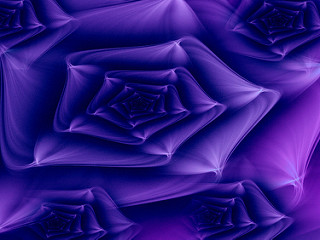

In [12]:
img = cv2.imread(flowers_images_dict['roses'][0])
img

In [13]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [14]:
X,y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (180,180))
    X.append(resized_img)
    y.append(flower_labels_dict.get(flower_name))

In [15]:
y[:5]

[0, 0, 0, 0, 0]

array([[[ 34,  17, 126],
        [ 34,  17, 130],
        [ 32,  16, 129],
        ...,
        [  1,   2, 110],
        [  9,   6, 113],
        [ 22,   7, 125]],

       [[  7,   4, 111],
        [ 11,   6, 115],
        [ 19,  11, 120],
        ...,
        [  0,   0,  96],
        [  1,   2, 105],
        [  5,   3, 116]],

       [[  0,   2,  93],
        [  1,   1,  95],
        [  4,   3, 100],
        ...,
        [  1,   0,  87],
        [  1,   6, 103],
        [  3,   6, 112]],

       ...,

       [[  2,   0,  87],
        [  0,   0,  83],
        [  0,   0,  82],
        ...,
        [ 78,  29, 161],
        [ 81,  31, 163],
        [ 84,  33, 166]],

       [[  4,   0,  86],
        [  2,   0,  84],
        [  2,   2,  86],
        ...,
        [ 81,  31, 163],
        [ 82,  32, 164],
        [ 86,  35, 168]],

       [[  0,   3,  85],
        [  0,   2,  85],
        [  1,   2,  84],
        ...,
        [ 82,  32, 164],
        [ 84,  34, 166],
        [ 90,  37, 170]]], dtype=uint8)
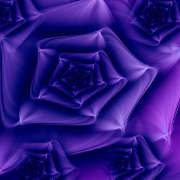

In [16]:
X[0]

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [ ]:
len(X_train)

2752

In [ ]:
len(X_test)

918

In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled[0]

array([[[0.01176471, 0.00392157, 0.00392157],
        [0.01960784, 0.01568627, 0.01568627],
        [0.01176471, 0.01960784, 0.01568627],
        ...,
        [0.00784314, 0.03137255, 0.01960784],
        [0.01960784, 0.02352941, 0.01568627],
        [0.02745098, 0.00392157, 0.00784314]],

       [[0.00392157, 0.00784314, 0.00784314],
        [0.01176471, 0.        , 0.00392157],
        [0.03921569, 0.        , 0.00392157],
        ...,
        [0.03137255, 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.        ],
        [0.00784314, 0.01176471, 0.00784314]],

       [[0.01960784, 0.01176471, 0.00784314],
        [0.04313725, 0.01960784, 0.02745098],
        [0.02745098, 0.02352941, 0.02352941],
        ...,
        [0.00784314, 0.        , 0.        ],
        [0.03529412, 0.02352941, 0.02745098],
        [0.02745098, 0.00784314, 0.00784314]],

       ...,

       [[0.02352941, 0.00784314, 0.00392157],
        [0.05098039, 0.03529412, 0.03921569],
        [0.00392157, 0

In [ ]:
num_classes = 5

model = keras.Sequential([
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 68s 771ms/step - accuracy: 0.2287 - loss: 5.6451
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 943ms/step - accuracy: 0.2367 - loss: 1.6094
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 70s 808ms/step - accuracy: 0.2441 - loss: 1.6094
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 76s 740ms/step - accuracy: 0.2504 - loss: 1.6094
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 936ms/step - accuracy: 0.2335 - loss: 1.6094
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 63s 716ms/step - accuracy: 0.2299 - loss: 1.6094
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 73s 846ms/step - accuracy: 0.2388 - loss: 1.6094
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 72s 733ms/step - accuracy: 0.2404 - loss: 1.6094
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 82s 736ms/step - accuracy: 0.2497 - loss: 1.6094
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 64s 742ms/step - accuracy: 0.2385 - loss: 1.6094


In [ ]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.2473 - loss: 1.6094


[1.609437346458435, 0.24618735909461975]

In [ ]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step


array([[-36.77204  , -27.07501  ,  -3.1462169,  -5.140585 , -23.283085 ],
       [-33.917206 , -25.53465  ,  -2.0598977,  -4.805481 , -21.290407 ],
       [-37.515617 , -28.463968 ,  -2.6283367,  -5.3056846, -23.515491 ],
       ...,
       [-55.942192 , -42.25614  ,  -4.7923737,  -8.000086 , -34.887936 ],
       [-43.27262  , -32.98779  ,  -3.19751  ,  -6.1835713, -26.991331 ],
       [-52.347694 , -39.67184  ,  -3.7423387,  -7.341482 , -32.787975 ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([2.1931777e-15, 3.5681316e-11, 8.8020456e-01, 1.1979552e-01,
       1.5821701e-09], dtype=float32)>

In [ ]:
np.argmax(score)

np.int64(2)

In [ ]:
y_test[0]

np.int64(1)

In [20]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


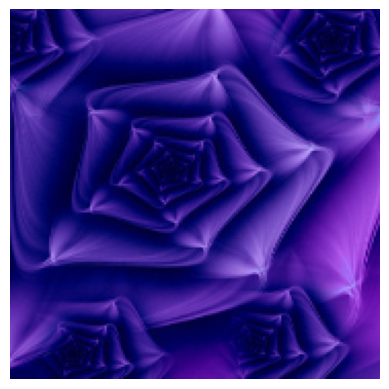

In [ ]:
plt.axis('off')
plt.imshow(X[0])

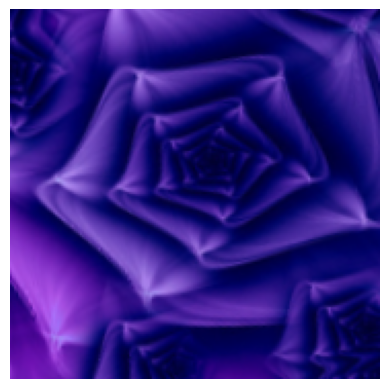

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [21]:
num_classes = 5

model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.2035 - loss: 4.3105
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2173 - loss: 4.2565
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2019 - loss: 4.1854
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.2018 - loss: 4.1293
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.1983 - loss: 4.3110
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.1894 - loss: 4.2379
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2113 - loss: 4.1061
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.2098 - loss: 4.1288
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.1891 - loss: 4.1596
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.1763 - loss: 4.1217


In [22]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 399ms/step - accuracy: 0.2046 - loss: 3.9649


[4.0902018547058105, 0.1917211264371872]

In most cases, accuracy goes up after data augmentation, this doesn't seem to be one of them